#**Dataset** **details**

It contains 21613 training data points and 21 features that might help us predict the selling price of a house.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Project 2/Linear Regression/kc_house_data.csv')
print(dataset.shape)
dataset.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
X = dataset['sqft_living']
Y = dataset['price']

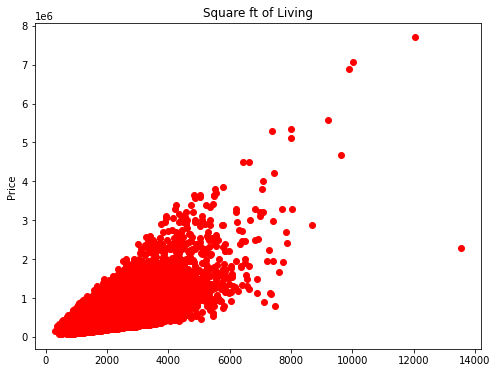

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.ylabel('Price')
plt.title('Square ft of Living')
plt.scatter(X,Y,c='r')
plt.show()

Text(0.5, 1.0, 'Correlation between features')

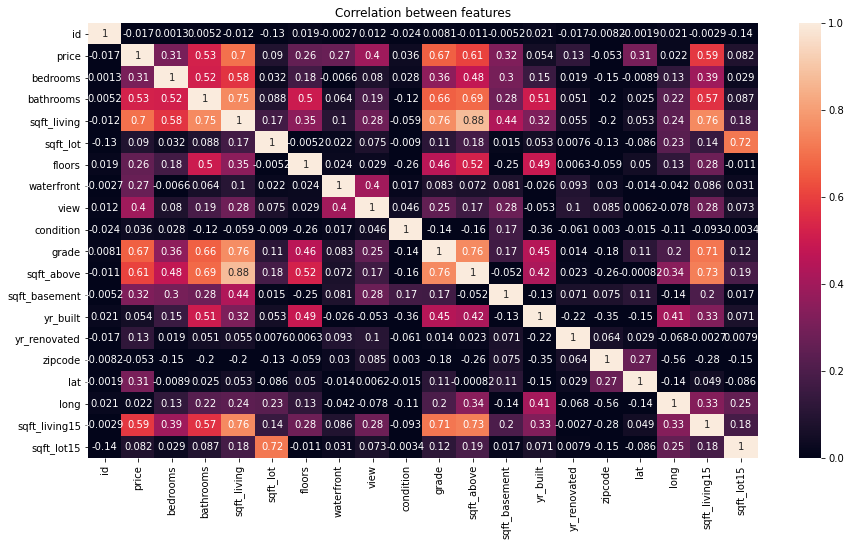

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot = True,fmt='.2g',vmin=0, vmax=1)
plt.title('Correlation between features')

##Standardising data

In [ ]:
def standardise(X_train):
    mean = np.mean(X_train, axis=0)
    scale = np.std(X_train, axis=0, ddof=1)
    X_std = (X_train - mean) / scale
    return X_std

In [ ]:
X = standardise(X)
X=np.asarray(X)
X = X.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

Error/Cost function bold text

In [ ]:
def computeError(b, slope, x, y):
    totalError = 0
    z = np.ones(y.shape, dtype=None, order='C')
    b = z*b
    _y = slope*x+b
    totalError = np.sum((y-_y)**2)
    return totalError / float(len(x))

Gradient Descent

In [ ]:
def sgd_linear_reg(X_train,y_train):
  slope = 0
  b = 0

  learning_rate = 0.01  #learning Rate
  epochs = 2000  # The number of epochs to perform gradient descent

  n = float(len(X_train)) # Number of elements in X_train

  # Performing Gradient Descent 
  for i in range(epochs): 
      Y_pred = slope*X_train + b  # The current predicted value of Y
      patial_dm = (-2/n) * sum(X_train * (y_train - Y_pred))  # Derivative slope
      patial_dc = (-2/n) * sum(X_train - Y_pred)  # Derivative  b 
      slope -= learning_rate * patial_dm  # Update slope
      b -=learning_rate * patial_dc  # Update b
      cost = computeError(b,slope,X_train,y_train)
  return slope,b,cost

# Model Training

In [ ]:
import time
start = time.time()
slope,b,cost = sgd_linear_reg(X_train,y_train)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 13.12343454360962


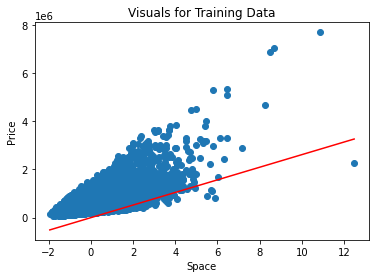

In [ ]:
Y_pred = slope*X_train + b
plt.title ("Visuals for Training Data")
plt.xlabel("Space")
plt.ylabel("Price")
plt.scatter(X_train, y_train) 
plt.plot([min(X_train), max(X_train)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:
predictions = slope * X_test + b
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))

Mean Absolute Error:  532974.2786350393


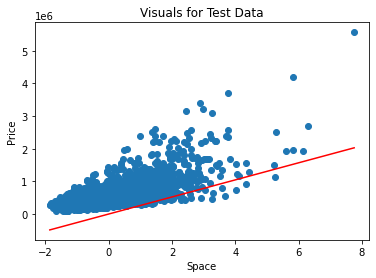

In [ ]:
plt.scatter(X_test, y_test) 
plt.title("Visuals for Test Data")
plt.xlabel("Space")
plt.ylabel("Price")
plt.plot([min(X_test), max(X_test)], [min(predictions), max(predictions)], color='red')  # regression line
plt.show()